In [16]:
import tensorflow as tf
import matplotlib.pyplot as plt
import matplotlib
import time
matplotlib.rcParams['figure.figsize'] = [9, 6]

# Basic Optimization using Adam

In [17]:
opt = tf.keras.optimizers.Adam(learning_rate=0.1)
var1 = tf.Variable(10.0)
loss = lambda: (var1 ** 2)/2.0       # d(loss)/d(var1) == var1
step_count = opt.minimize(loss, [var1]).numpy()
# The first step is `-learning_rate*sign(grad)`
var1.numpy()

9.9

## Example: Fitting a function for a set of data points

In [18]:
class Model(tf.Module):

  def __init__(self):
    # Randomly generate weight and bias terms
    rand_init = tf.random.uniform(shape=[3], minval=0., maxval=5., seed=22)
    # Initialize model parameters
    self.w_q = tf.Variable(rand_init[0])
    self.w_l = tf.Variable(rand_init[1])
    self.b = tf.Variable(rand_init[2])

  @tf.function
  def __call__(self, x):
    # Quadratic Model : quadratic_weight * x^2 + linear_weight * x + bias
    return self.w_q * (x**2) + self.w_l * x + self.b

In [19]:
quad_model = Model()

In [20]:
def plot_preds(x, y, f, model, title):
  plt.figure()
  plt.plot(x, y, '.', label='Data')
  plt.plot(x, f(x), label='Ground truth')
  plt.plot(x, model(x), label='Predictions')
  plt.title(title)
  plt.legend()

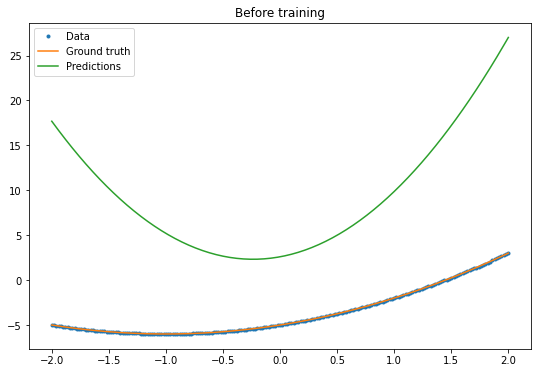

In [21]:
x = tf.linspace(-2, 2, 201) # a list of inputs
x = tf.cast(x, tf.float32)
def f(x):  # actual relationship
  y = x**2 + 2*x - 5
  return y

y = f(x) #+ tf.random.normal(shape=[201]) #don't know why normal dist is necessary


plot_preds(x, y, f, quad_model, 'Before training')

In [44]:
@tf.function
def mse_loss(y_pred, y):
  return tf.reduce_mean(tf.square(y_pred - y)) # computes mean

In [45]:
batch_size = 32
dataset = tf.data.Dataset.from_tensor_slices((x, y))
dataset = dataset.shuffle(buffer_size=x.shape[0]).batch(batch_size)

Mean squared error for step 0: 43.135
Mean squared error for step 10: 5.431
Mean squared error for step 20: 1.932
Mean squared error for step 30: 0.668
Mean squared error for step 40: 0.233
Mean squared error for step 50: 0.081
Mean squared error for step 60: 0.029
Mean squared error for step 70: 0.010
Mean squared error for step 80: 0.003
Mean squared error for step 90: 0.001


time took: 3.1829051971435547 seconds


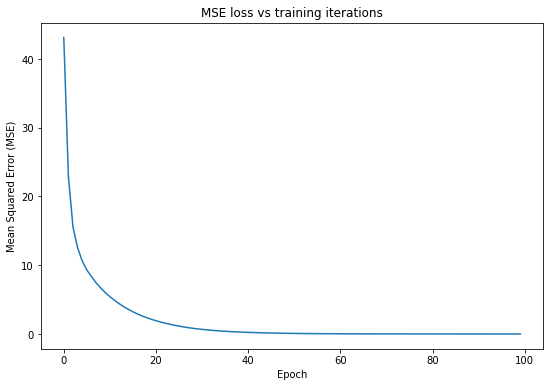

In [46]:
#timing 
t0 = time.time()
# Set training parameters
epochs = 100
learning_rate = 0.01
losses = []
s = 0 

quad_model = Model()
# Format training loop
for epoch in range(epochs):
  for x_batch, y_batch in dataset:
    with tf.GradientTape() as tape:
      batch_loss = mse_loss(quad_model(x_batch), y_batch)
      s+=1
    # Update parameters with respect to the gradient calculations
    grads = tape.gradient(batch_loss, quad_model.variables)
    for g,v in zip(grads, quad_model.variables):
        v.assign_sub(learning_rate*g)
  # Keep track of model loss per epoch
  loss = mse_loss(quad_model(x), y)
  losses.append(loss)
  if epoch % 10 == 0:
    print(f'Mean squared error for step {epoch}: {loss.numpy():0.3f}')

# Plot model results
print("\n")
plt.plot(range(epochs), losses)
plt.xlabel("Epoch")
plt.ylabel("Mean Squared Error (MSE)")
plt.title('MSE loss vs training iterations');
print('time took: {} seconds'.format(time.time() - t0))

In [36]:
201/32

6.28125

In [27]:
np.shape(losses)

(100,)

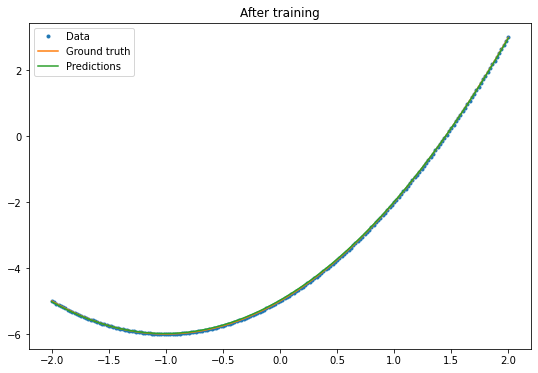

In [25]:
plot_preds(x, y, f, quad_model, 'After training')

# In "graph" mode

In [41]:
quad_model = Model()

Mean squared error for step 0: 0.000
Mean squared error for step 10: 0.000
Mean squared error for step 20: 0.000
Mean squared error for step 30: 0.000
Mean squared error for step 40: 0.000
Mean squared error for step 50: 0.000
Mean squared error for step 60: 0.000
Mean squared error for step 70: 0.000
Mean squared error for step 80: 0.000
Mean squared error for step 90: 0.000


time took: 9.443979978561401 seconds


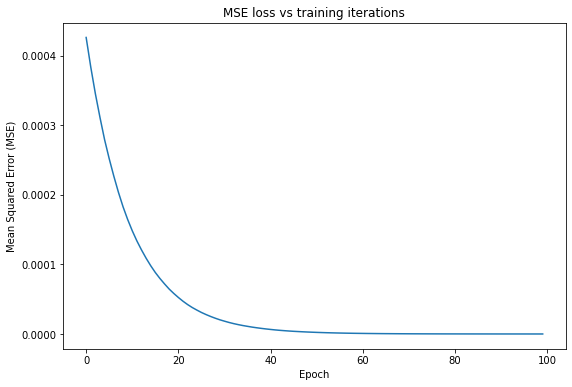

In [47]:
#timing 
t0 = time.time()
# Set training parameters
epochs = 100
learning_rate = 0.01
losses = []

@tf.function
def train_step():
    for x_batch, y_batch in dataset:
        with tf.GradientTape() as tape:   
            batch_loss = mse_loss(quad_model(x_batch), y_batch)
        # Update parameters with respect to the gradient calculations
        grads = tape.gradient(batch_loss, quad_model.variables)
        for g,v in zip(grads, quad_model.variables):
            v.assign_sub(learning_rate*g)
    loss =  mse_loss(quad_model(x), y)
    return loss

# Format training loop
for epoch in range(epochs):
    loss = train_step()
    losses.append(loss)
    if epoch % 10 == 0:
        print(f'Mean squared error for step {epoch}: {loss.numpy():0.3f}')

# Plot model results
print("\n")
plt.plot(range(epochs), losses)
plt.xlabel("Epoch")
plt.ylabel("Mean Squared Error (MSE)")
plt.title('MSE loss vs training iterations');
print('time took: {} seconds'.format(time.time() - t0))

# Dump

In [23]:
def function(x): 
    return x**2
def f2(f1, x): 
    return f1(x)**2
f2(function, 2)

16